In [188]:
# 已知条件
H = 200
D = 180
e = 40
K = 1.035
coefficient_l_AC_2 = 0.38
Q1 = 140
Q2 = 115
Q3 = 190
conefficient_Rho_square = 0.17
n1 = 650
Delta = 1 / 100


In [189]:
#求解曲柄长度
import math


class Mechanism:
    """曲柄滑块机构的求解计算"""

    def __init__(self, K, H, e):
        self.K = K
        self.H = H
        self.e = e
        self.theta = 180 * (K - 1) / (K + 1)
        self.l = 0
        self.r = 0

    def cal_theta(self):
        return self.theta

    def solve(self):
        """return l and r"""
        # 三角形圆的半径
        theta = self.theta / 180 * math.pi
        H = self.H
        e = self.e
        R = H / (2 * math.sin(theta))

        CD = R * math.cos(theta)
        OE = math.sqrt(R**2 - (CD - e)**2)
        OF = OE + H / 2

        l_plus_r = math.sqrt(OF**2 + e**2)
        alpha = math.asin(OE / R)
        delta = alpha - theta
        l_minus_r = 2 * R * math.sin(delta / 2)

        self.l = (l_plus_r + l_minus_r) / 2
        self.r = (l_plus_r - l_minus_r) / 2

        return (self.l, self.r)


crank_slider = Mechanism(K, H, e)

crank_slider.solve()

display("theta = {}".format(crank_slider.theta))
display("l = {}".format(crank_slider.l))
display("r = {}".format(crank_slider.r))


'theta = 3.0958230958230883'

'l = 397.52175616699924'

'r = 99.45807704268577'

In [190]:
# 以 O 点建立坐标系
from shapely import geometry as geo

import numpy as np

name_list = [
    'A0', 'A1', 'A2', "A2'", 'A3', 'A4', 'A5', 'A6', "A6'", 'A7', 'A8', 'A9',
    "A9'", 'A10', 'A11'
]

class Coordinates:

    def __init__(self, crank_slider):
        self.l = crank_slider.l
        self.r = crank_slider.r
        l_O_B_up = self.l + self.r
        l_O_B_down = self.l - self.r
        self.B_up = geo.Point(e, math.sqrt(l_O_B_up**2 - e**2))
        self.B_down = geo.Point(e, math.sqrt(l_O_B_down**2 - e**2))
        self.O = geo.Point(0, 0)
        self.theta_list = np.array([])
        self.A_list = []
        self.B_list = []

    def __cal_A0_theta(self):
        return math.atan(self.B_up.y / self.B_down.x)

    def __cal_A6_prime_theta(self):
        return math.atan(self.B_down.y / self.B_down.x) - math.pi

    def __cal_A2_prime_and_A9_prime_theta(self):
        """return (A2', A9')"""
        l_O_B_prime = math.sqrt(self.r**2 + self.l**2)
        B_prime = geo.Point(e, math.sqrt(l_O_B_prime**2 - e**2))
        theta_B_prime = math.atan(B_prime.y / B_prime.x)
        theta_B_0_A = math.atan(self.l / self.r)
        return (theta_B_prime - theta_B_0_A,
                theta_B_prime + theta_B_0_A - 2 * math.pi)

    def __cal_theta_list(self):
        delta_theta = 30 / 180 * math.pi
        temp_theta_list = []
        A0 = self.__cal_A0_theta()
        for i in range(0, 12):
            temp_theta = A0 - i * delta_theta
            temp_theta_list.append(temp_theta)
        (A2_prime, A9_prime) = self.__cal_A2_prime_and_A9_prime_theta()
        A6_prime = self.__cal_A6_prime_theta()
        temp_theta_list.extend([A2_prime, A6_prime, A9_prime])
        temp_theta_list.sort(reverse=True)
        self.theta_list = np.array(temp_theta_list, copy=True)

    def __cal_B_list(self):
        for theta_A in self.theta_list:
            A = geo.Point(self.r * math.cos(theta_A),
                          self.r * math.sin(theta_A))
            B_x = e
            B_y = A.y + math.sqrt(self.l**2 - (B_x - A.x)**2)
            B = geo.Point(B_x, B_y)
            self.A_list.append(A)
            self.B_list.append(B)

    def solve(self):
        self.__cal_theta_list()
        self.__cal_B_list()

    def draw(self):
        pass




def show_state(list_state):
    for (state_cur, name) in zip(list_state, name_list):
        display("{0} : {1}".format(name, state_cur))


def show_state_xy(list_state):
    for (state_cur, name) in zip(list_state, name_list):
        display("{0} : ({1}, {2})".format(name, state_cur.x, state_cur.y))


coor = Coordinates(crank_slider)
coor.solve()

display("B_up = ({0}, {1})".format(coor.B_up.x, coor.B_up.y))
display("B_down = ({0}, {1})".format(coor.B_down.x, coor.B_down.y))

angle_list = coor.theta_list / math.pi * 180

show_state(angle_list)
show_state_xy(coor.B_list)


'B_up = (40.0, 495.36749451001157)'

'B_down = (40.0, 295.3674945100115)'

'A0 : 85.38348904587565'

'A1 : 55.38348904587566'

'A2 : 25.383489045875663'

"A2' : 8.444951494009407"

'A3 : -4.616510954124342'

'A4 : -34.61651095412434'

'A5 : -64.61651095412432'

'A6 : -94.61651095412434'

"A6' : -97.71233404994743"

'A7 : -124.61651095412435'

'A8 : -154.6165109541243'

'A9 : -184.61651095412432'

"A9' : -199.64859829351343"

'A10 : -214.6165109541243'

'A11 : -244.6165109541243'

'A0 : (40.0, 495.3674945100115)'

'A1 : (40.0, 479.0304466953191)'

'A2 : (40.0, 437.0181044110238)'

"A2' : (40.0, 407.81791980628316)"

'A3 : (40.0, 385.0936529292202)'

'A4 : (40.0, 338.8123194395937)'

'A5 : (40.0, 307.65674071369654)'

'A6 : (40.0, 295.4771448320052)'

"A6' : (40.0, 295.36749451001157)"

'A7 : (40.0, 303.7796956916855)'

'A8 : (40.0, 333.07867303633213)'

'A9 : (40.0, 380.3823411454104)'

"A9' : (40.0, 407.8179198062831)"

'A10 : (40.0, 434.8860338331644)'

'A11 : (40.0, 478.69426157911295)'

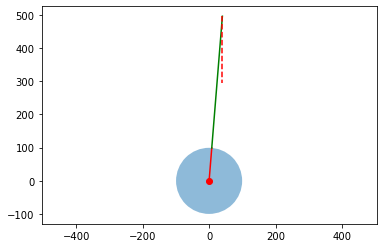

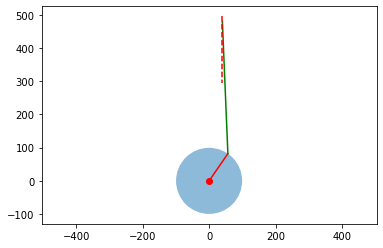

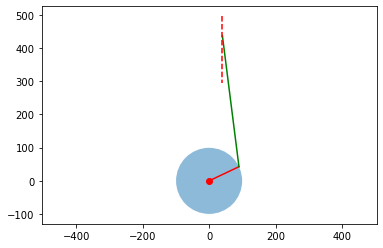

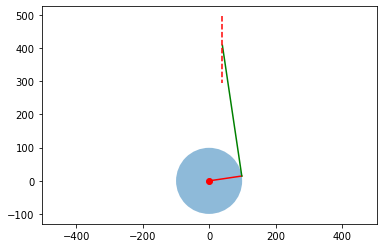

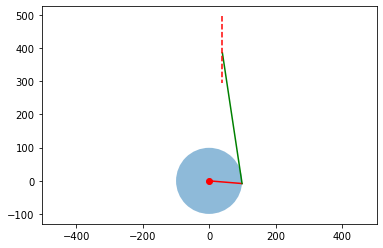

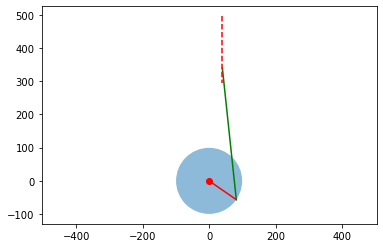

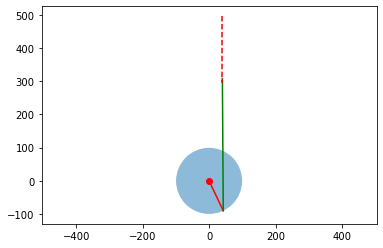

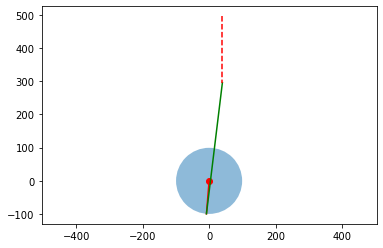

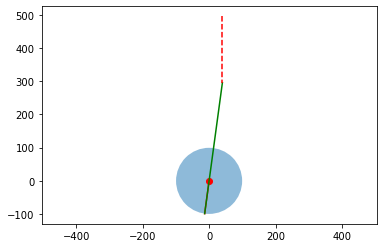

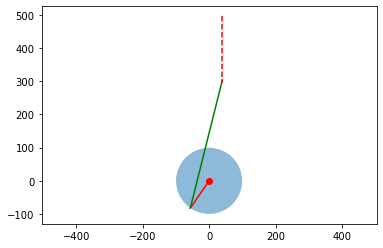

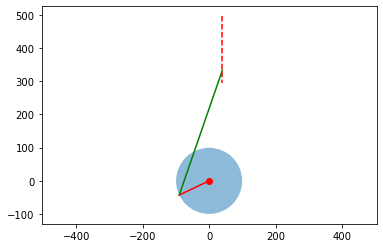

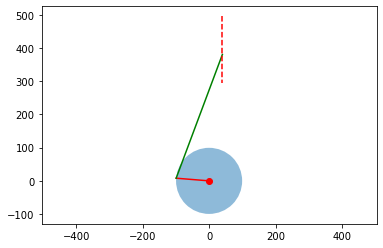

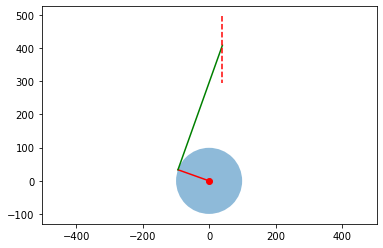

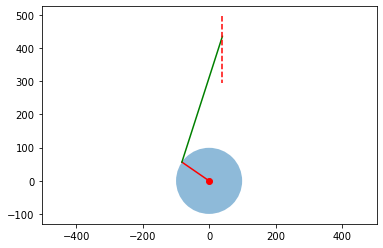

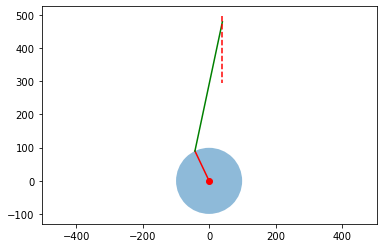

In [191]:
from matplotlib.patches import Ellipse, Circle
import matplotlib.pyplot as plt


class Crank_slider_shape:

    def __init__(self, coor):
        self.num_x = 1
        self.num_y = 15
        self.coor = coor

    def __draw_O(self, ax):
        x, y = 0, 0
        ax.plot(x, y, 'ro')

    def __draw_circles(self, ax):
        cir1 = Circle(xy=(0.0, 0.0), radius=self.coor.r, alpha=0.5)
        ax.add_patch(cir1)

    def __draw_crank(self, ax, A):
        ax.plot([0, A.x], [0, A.y], color="red")

    def __draw_link(self, ax, A, B):
        ax.plot([A.x, B.x], [A.y, B.y], color="green")

    def __draw_slider(self, ax):
        ax.plot([self.coor.B_up.x, self.coor.B_down.x],
                [self.coor.B_up.y, self.coor.B_down.y],
                color="red",
                linestyle="--")

    def __show(self, i, A, B):
        self.fig = plt.figure(i)
        ax = self.fig.add_subplot(111)
        self.__draw_O(ax)
        self.__draw_circles(ax)
        self.__draw_crank(ax, A)
        self.__draw_link(ax, A, B)
        self.__draw_slider(ax)

    def show(self):
        for i, A, B in zip(range(1, 16), coor.A_list, coor.B_list):
            self.__show(i, A, B)
            plt.axis('scaled')
            #changes limits of x or y axis so that equal increments of x and y have the same length
            plt.axis('equal')
        plt.show()


mechanism_shape = Crank_slider_shape(coor)

mechanism_shape.show()